In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pyfaidx import Fasta

In [2]:
attr_file = "/data5/deepro/starrseq/papers/results/4_ml_classification_fragment_category/data/LEF1/peaks_vs_notpeaks/resnet/attributions.npy"
gen_file = "/data5/deepro/starrseq/papers/results/4_ml_classification_fragment_category/data/LEF1/peaks_vs_notpeaks/resnet/locations.npy"
score_file = "/data5/deepro/starrseq/papers/results/4_ml_classification_fragment_category/data/LEF1/peaks_vs_notpeaks/resnet/resnet.csv.gz"
genome_fasta = "/data5/deepro/genomes/hg38/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta"

In [3]:
attr_arr = np.load(attr_file)
gen_arr = np.load(gen_file)
gen_df = pd.DataFrame(gen_arr, columns=["chrm", "start", "end"])
gen_df.start = gen_df.start.astype("int64")
gen_df.end = gen_df.end.astype("int64")
score_df = pd.read_csv(score_file, header=None, names=["ypred", "ytarget", "chrm", "start", "end"])
genome = Fasta(genome_fasta, as_raw=True)

In [4]:
assert score_df.loc[:, ["chrm", "start", "end"]].equals(gen_df)

In [5]:
score_df = score_df.sort_values("ypred")

In [6]:
score_df

,ypred,ytarget,chrm,start,end
347,2.963239e-26,0,chr1,31012044,31012544
2345,3.107273e-26,0,chr12,50665544,50666044
16330,6.073939e-25,0,chr17,43573914,43574414
22562,1.084429e-24,0,chr19,47891600,47892100
13533,1.345959e-24,0,chr15,80735536,80736036
...,...,...,...,...,...
142,1.000000e+00,1,chr17,75124084,75124584
129,1.000000e+00,1,chr9,129139697,129140197
126,1.000000e+00,1,chr8,629394,629894
65,1.000000e+00,1,chr15,70833801,70834301


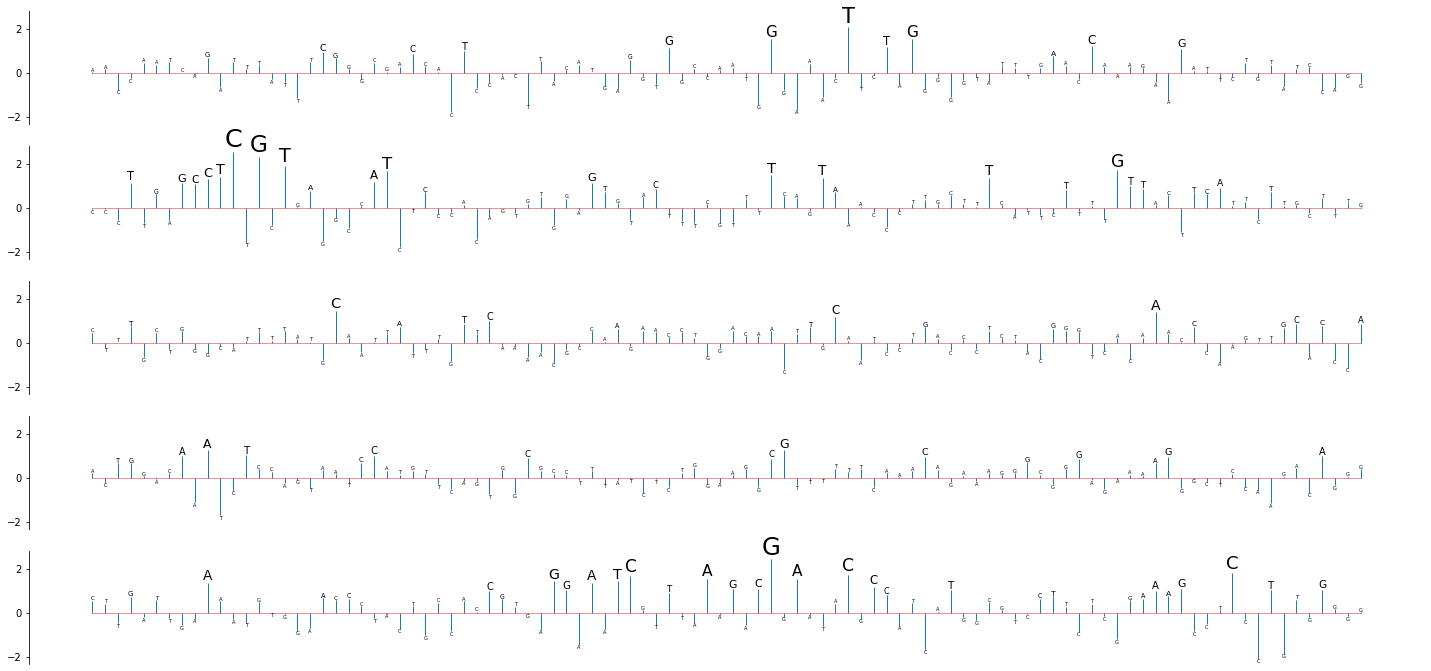

In [14]:
score_idx = -10

chrm, start, end = score_df.iloc[score_idx].loc[["chrm", "start", "end"]].values
attr_idx = score_df.iloc[score_idx].name
seq = list(genome.get_seq(chrm, start, end))


nrows=5
bp_per_row=len(seq)//nrows

fig, ax = plt.subplots(nrows, 1, figsize=(25, 12), sharey=True)

start = 0
for row in range(nrows):
    for i in range(start, start + bp_per_row):
        m = max(0.5, attr_arr[attr_idx][i])
        m = min(3, m)
        va = "bottom" if attr_arr[attr_idx][i]>0 else "top"
        ax[row].text(i-start, attr_arr[attr_idx][i], seq[i], va=va, ha="center", fontsize=10*m)
        
    markers,stems,base = ax[row].stem(range(bp_per_row), attr_arr[attr_idx][start:start+bp_per_row], markerfmt=" ")
    plt.setp(stems, 'linewidth', 1)
    plt.setp(base, 'linewidth', 0.5)
    ax[row].spines[['right', 'top', "bottom"]].set_visible(False)
    ax[row].xaxis.set_visible(False)
    start += bp_per_row